In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chatglm3-6b/pytorch/6b/6/model.safetensors.index.json
/kaggle/input/chatglm3-6b/pytorch/6b/6/quantization.py
/kaggle/input/chatglm3-6b/pytorch/6b/6/config.json
/kaggle/input/chatglm3-6b/pytorch/6b/6/tokenization_chatglm.py
/kaggle/input/chatglm3-6b/pytorch/6b/6/model-00001-of-00007.safetensors
/kaggle/input/chatglm3-6b/pytorch/6b/6/model-00003-of-00007.safetensors
/kaggle/input/chatglm3-6b/pytorch/6b/6/README.md
/kaggle/input/chatglm3-6b/pytorch/6b/6/MODEL_LICENSE
/kaggle/input/chatglm3-6b/pytorch/6b/6/tokenizer_config.json
/kaggle/input/chatglm3-6b/pytorch/6b/6/pytorch_model.bin.index.json
/kaggle/input/chatglm3-6b/pytorch/6b/6/configuration_chatglm.py
/kaggle/input/chatglm3-6b/pytorch/6b/6/modeling_chatglm.py
/kaggle/input/chatglm3-6b/pytorch/6b/6/model-00006-of-00007.safetensors
/kaggle/input/chatglm3-6b/pytorch/6b/6/special_tokens_map.json
/kaggle/input/chatglm3-6b/pytorch/6b/6/model-00005-of-00007.safetensors
/kaggle/input/chatglm3-6b/pytorch/6b/6/.gitattributes
/kag

In [2]:
!pip install wikipedia
!pip install huggingface_hub
!pip install transformers
!pip install llama-index llama-index-embeddings-huggingface llama-index-llms-huggingface peft==0.11.0
!pip install llama-index-vector-stores-faiss
!pip install faiss-gpu

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=45577da0cc29903b90baa7c026da82fc3b060f53f0123ca15f3323b1491ba13d
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia
INFO: pip is looking at multiple versions of huggingface-hub[inference] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of huggingface-hub[inference] to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━

本次notebook为kaggle上运行
主要内容：

1. 利用WikipediaReader搜索红楼梦相关信息，使用faiss建立矢量本地存储文件
2. 使用开源embed：paraphrase-multilingual-mpnet-base-v2和llm:Qwen2.5-0.5b-instruct
4. llamaindex中document会先变成node，node再进行嵌入变成索引index
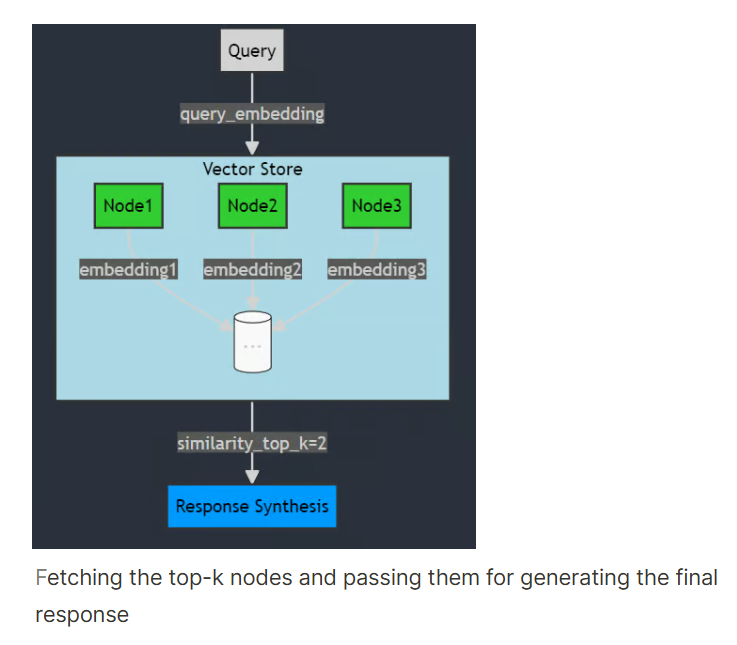

In [3]:
from llama_index.core import download_loader
WikipediaReader = download_loader('WikipediaReader')
loader = WikipediaReader()
# lang_prefix代表返回的语言
documents = loader.load_data(pages=['红楼梦', '贾宝玉'],lang_prefix='zh')

<ipython-input-3-2d091a36e36d>:2: DeprecationWarning: Call to deprecated function (or staticmethod) download_loader. (`download_loader()` is deprecated. Please install tool using pip install directly instead.)
  WikipediaReader = download_loader('WikipediaReader')


In [4]:
documents[1]

Document(id_='47596', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, metadata_template='{key}: {value}', metadata_separator='\n', text_resource=MediaResource(embeddings=None, data=None, text='賈寶玉是《紅樓夢》中的第一主角，銜通靈寶玉而誕，為榮國府二老爺賈政和王夫人的次子。出場時其同母兄賈珠已死，故為賈政惟一的嫡子，深受賈母疼愛，同姐妹們一處嬌養。其同母姐賈元春進宮為妃，異母的弟弟賈環和妹妹賈探春均為趙姨娘所生。賈府下人稱其「寶二爺」，在大觀園詩社中有別號怡紅公子、絳洞花王、富貴閒人。情榜評為「情不情」。在第三回「金陵城起複賈雨村，榮國府收養林黛玉」中得知，「寶玉」爲其小名，而非正式的名字。其真名在紅學界有多種不同的説法，諸如賈瑛、賈玑或賈寶。\n賈寶玉与江南甄家的甄宝玉同名，且外貌極為相似。作者以「甄」、「賈」之姓暗喻「真」、「假」，表現二元補襯的思想。賈寶玉的前世真身为赤霞宫神瑛侍者，对绛珠仙草（林黛玉前世）施以甘露之惠，相互许下「木石前盟」，與寶玉、寶釵的婚姻「金玉良緣」相對。作者以此渲染出了佛道的因果关系，以及人生如梦的主旨。\n其母王夫人称之为「混世魔王」。小说第三回中王夫人因对黛玉说：「你舅舅今日斋戒去了，再见罢。只是有一句话嘱咐你：你三个姊妹倒都极好，以后一处念书认字学针线，或是偶一顽笑，都有尽让的。但我不放心的最是一件：我有一个孽根祸胎， 是家裏的『混世魔王』，今日因庙裏还愿去了，尚未回来，晚间你看见便知了。你只以后不要睬他，你这些姊妹都不敢沾惹他的」 。\n\n\n== 背景與身份 ==\n根據小說第一回甄士隱的夢境，賈寳玉由神瑛侍者脱胎而成，對絳珠仙草有灌溉之恩，因此有還淚一說，出生時口含一塊由女媧補天遺留的大青石化成的玉。\n傳說在遠古時代，共工和祝融爭鬥失利，把西北天柱不周山撞斷，天破了一個洞。於是女媧煉三萬六千五百零一塊石頭補天，最後剩餘一塊不用。其一塊石頭後來遇到一和尚和一道士，變形為一塊美玉，名通靈寶玉。後來，赤霞宮神瑛侍

In [5]:
# 使用faiss存储
import faiss
# 768是embed的编码维度，必须要匹配！
faiss_index = faiss.IndexFlatL2(768)

In [6]:
from llama_index.core import (
    load_index_from_storage,
    VectorStoreIndex,
    StorageContext,Settings
)
from llama_index.vector_stores.faiss import FaissVectorStore
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from llama_index.llms.huggingface import HuggingFaceLLM
import torch

/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_id" in DeployedModel has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_name" in HuggingFaceLLM has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_kwargs" in HuggingFaceLLM has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_name" in HuggingFaceInferenceAPI has co

In [7]:
# 加载embed模型和聊天模型
llm = HuggingFaceLLM(
    context_window=4096,
    max_new_tokens=2048,
    generate_kwargs={"temperature": 0.0, "do_sample": False},
    tokenizer_name="/kaggle/input/qwen2.5/transformers/0.5b-instruct/1",
    model_name="/kaggle/input/qwen2.5/transformers/0.5b-instruct/1",
    device_map="auto",
    # change these settings below depending on your GPU
    model_kwargs={"torch_dtype": torch.float16},
)
embed_model = HuggingFaceEmbedding(model_name="sentence-transformers/paraphrase-multilingual-mpnet-base-v2")


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/723 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/402 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [8]:
# 设置embed和model
Settings.llm = llm
Settings.embed_model = embed_model

In [9]:
vector_store = FaissVectorStore(faiss_index=faiss_index)
# vector store的管理器，确保矢量存储在整个过程中可访问和管理
storage_context = StorageContext.from_defaults(vector_store=vector_store)
# 从documents加载并将其转换成嵌入，嵌入存储在定义的FaissVectorStore中
index = VectorStoreIndex.from_documents(
    documents, storage_context=storage_context
)

# 保存
index.storage_context.persist('/kaggle/working/storage')

# 加载
# vector_store = FaissVectorStore.from_persist_dir("./storage")
# storage_context = StorageContext.from_defaults(
#     vector_store=vector_store, persist_dir="./storage"
# )
# index = load_index_from_storage(storage_context=storage_context)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
# 初始化查询引擎 （简单）
query_engine = index.as_query_engine()
response = query_engine.query("贾宝玉是谁")
print(response.response)
for i in response.source_nodes:
    print('\n参考text：',i.text)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.8` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:589: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `20` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  warnings.warn(


《红楼梦》中贾宝玉是小说的主要角色之一，他生活在藕香榭附近的蓼风轩，性格孤僻冷漠，擅长绘画，喜欢佛教，贾家衰败后修行，终身未嫁。他是曹雪芹笔下的另一个远避俗世的角色。他的判词是"勘破三春景不长，缁衣顿改昔年妆。可怜绣户侯门女，独卧青灯古佛傍。"
答案：贾宝玉是小说的主要角色之一。他在藕香榭附近的蓼风轩，性格孤僻冷漠，擅长绘画，喜欢佛教，贾家衰败后修行，终身未嫁。他是曹雪芹笔下的另一个远避俗世的角色。他的判词是"勘破三春景不长，缁衣顿改昔年妆。可怜绣户侯门女，独卧青灯古佛傍。"

参考text： 住在藕香榭周围的蓼风轩，在诗社中号为「藕榭」。性情孤僻冷漠，善绘画，喜佛法，贾家衰败后修行，终身未嫁。是红楼梦中另一个远避俗世的角色。判词称“勘破三春景不长，缁衣顿改昔年妆。可怜绣户侯门女，独卧青灯古佛傍。”暗示出家为尼。
妙玉 - 贾府家庙中的年轻带发修行尼姑，她实际身份是贾府世交之女，因生父得罪于朝廷被抄家，以尼姑身份避祸于贾家。她生性好洁，穎慧捷悟，判曲称她“气质美如兰，才华阜比仙，天生成孤癖”、“依旧是风尘肮脏违心愿”，暗示可能沦落风尘。一百二十回通行本中，被强盗掳去，生死不明。
王熙凤 - 另一女主角，普遍认为是红楼梦中最为鲜活的人物，具有强烈的世俗气息。为贾琏之妻，王夫人的侄女，即宝玉堂嫂及表姐，因此虽然身为邢夫人的媳妇，却帮王夫人处理荣府家务。精明能干，口舌伶俐，手腕灵活，手段毒辣。但害死尤二姐等人，导致贾府被御史弹劾；而克扣下人月钱违法放印子（高利贷），也成为贾府家产被抄后无法放还的主因。判词称“一从二令三人木，哭向金陵事更哀。”一种说法认为该句暗示最后被休妻（休拆字为人木），过世还葬金陵，即“王熙凤衣锦（寿衣）还乡”。程高本后40回中并没有被休。程高本第一百零一回中，王熙凤抽得签诗“去国离乡二十年，于今衣锦返家园。蜂采百花成蜜后，为谁辛苦为谁甜？”暗示离开金陵二十年后，过世身穿锦绣寿衣还葬金陵，一生争强斗胜，积蓄钱财，最后却不得享用。（还有一种錯誤說法认为“一从二令三人木”是说该句应该读作主动式，即开始她从于长辈等人，后来就因才干使唤（令）别人，最后就“退休”（因为从前80回后期她确实病体缠身，却并未有被命令或家族内失权的迹像）。但是妻子沒有退休這回事，應該純屬杜撰。

参考text： 據脂批八十回之後會去獄神廟探望寶玉。
紫綃：丫環之一，出現次數極少。高鶚

In [23]:
# （复杂）
from llama_index.core.retrievers import VectorIndexRetriever
from llama_index.core import get_response_synthesizer
from llama_index.core.query_engine import RetrieverQueryEngine
from llama_index.core.postprocessor import SimilarityPostprocessor

# similarity_top_k：返回的前k个最相关的node
retriever = VectorIndexRetriever(index=index, similarity_top_k=1)

response_synthesizer = get_response_synthesizer()

# similarity_cutoff=0.7 仅考虑相似性大于0.7的node
query_engine = RetrieverQueryEngine.from_args(
    retriever=retriever,
    response_mode='tree_summarize',
    response_synthesizer=response_synthesizer,
    node_postprocessors=[
        SimilarityPostprocessor(similarity_cutoff=0.5)]
)

In [28]:
response = query_engine.query("贾宝玉是谁")
response

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Response(response='《红楼梦》中贾宝玉是小说中一个主要人物，他生活在贾府之中，性格孤僻冷漠，善画，喜佛法，贾家衰败后修行，终身未嫁。他是红楼梦中另一个远避俗世的角色。判词称"勘破三春景不长，缁衣顿改昔年妆。可怜绣户侯门女，独卧青灯古佛傍。"\n答案：贾宝玉是小说中一个主要人物，生活在贾府之中，性格孤僻冷漠，善画，喜佛法，贾家衰败后修行，终身未嫁。他是红楼梦中另一个远避俗世的角色。判词称"勘破三春景不长，缁衣顿改昔年妆。可怜绣户侯门女，独卧青灯古佛傍。"', source_nodes=[NodeWithScore(node=TextNode(id_='48ec6e38-b90c-4e53-8622-5572cf20906a', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='7469', node_type='4', metadata={}, hash='b285b341713e8b6ee69afd17e08fccebef62eeefb89da88591b84b70659ca7c1'), <NodeRelationship.PREVIOUS: '2'>: RelatedNodeInfo(node_id='58a4a357-2a7d-4e4f-a206-bfff937dfca8', node_type='1', metadata={}, hash='7f04d673a3638f23f468298268a3b11b726ce1c4d286406ca03cd4602e9efffd'), <NodeRelationship.NEXT: '3'>: RelatedNodeInfo(node_id='11be9e3c-8412-4dd9-aca0-09c11fcfd2a7', node_type='1', metadata={}, hash='244bdf31b8bea3e7a6d0ece1cb63a79d1f3cdf85a1cfd4a27c45195119f4d206')}, met